In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tabulate import tabulate
import fbprophet
import warnings
from sklearn.metrics import mean_absolute_error

In [2]:
warnings.filterwarnings("ignore")

# Read The Data

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [4]:
x_df = pd.read_csv('10.csv', delimiter = ',', header = 0, index_col=False)
y_df = pd.read_csv('116.csv', delimiter = ',', header = 0, index_col=False)

In [5]:
x_df['time_date'] = pd.to_datetime(x_df['dttm_utc'], utc=True)
y_df['time_date'] = pd.to_datetime(y_df['dttm_utc'], utc=True)

x_df.set_index('time_date', inplace=True)
y_df.set_index('time_date', inplace=True)

x_df.drop(['dttm_utc', 'estimated'], axis=1, inplace=True)

y_df.drop(['dttm_utc'], axis=1, inplace=True)

x_df.drop(['timestamp'], axis=1, inplace=True)
y_df.drop(['timestamp'], axis=1, inplace=True)

x_df

,value,anomaly
time_date,,
2012-01-01 00:10:00+00:00,105.7895,NaN
2012-01-01 00:15:00+00:00,104.7318,NaN
2012-01-01 00:20:00+00:00,102.2920,NaN
2012-01-01 00:25:00+00:00,102.7851,NaN
2012-01-01 00:30:00+00:00,101.6106,NaN
...,...,...
2012-12-31 23:40:00+00:00,165.1246,NaN
2012-12-31 23:45:00+00:00,161.1274,NaN
2012-12-31 23:50:00+00:00,163.7619,NaN


In [6]:
V1_df = x_df['2012-01-03' : '2012-01-29']
V2_df = x_df['2012-02-03' : '2012-02-29']
V3_df = x_df['2012-03-03' : '2012-03-29']
C1_df = x_df['2012-06-03' : '2012-06-29']
C2_df = x_df['2012-07-03' : '2012-07-29']
C3_df = x_df['2012-08-03' : '2012-08-29']
P_df = y_df['2012-01-03' : '2012-01-29']

In [7]:
V1_df.index = V1_df.index + datetime.timedelta(days = 31)
V3_df.index = V3_df.index - datetime.timedelta(days = 29)
C1_df.index = C1_df.index - datetime.timedelta(days = 121)
C2_df.index = C2_df.index - datetime.timedelta(days = 151)
C3_df.index = C3_df.index - datetime.timedelta(days = 182)
P_df.index = P_df.index + datetime.timedelta(days = 31)

In [8]:
#def float_integer(V,index):
 #   n = len(V[index])
  #  x = []
   # Vi = V[index]
    #for i in range(n):
     #   if ((Vi[i]-int(Vi[i]))<0.5):
      #      x.append(int(Vi[i]))
       # else:
        #    x.append(int(Vi[i]+1))
        
    #V[index] = x

In [9]:
#float_integer(V1_df,'value')
#float_integer(V2_df,'value')
#float_integer(V3_df,'value')

In [10]:
V1 = V1_df['value']
V2 = V2_df['value']
V3 = V3_df['value']
C1 = C1_df['value']
C2 = C2_df['value']
C3 = C3_df['value']
P = P_df['value']

In [11]:
np.max(P)

38.3164

In [12]:
V1.dtypes

dtype('float64')

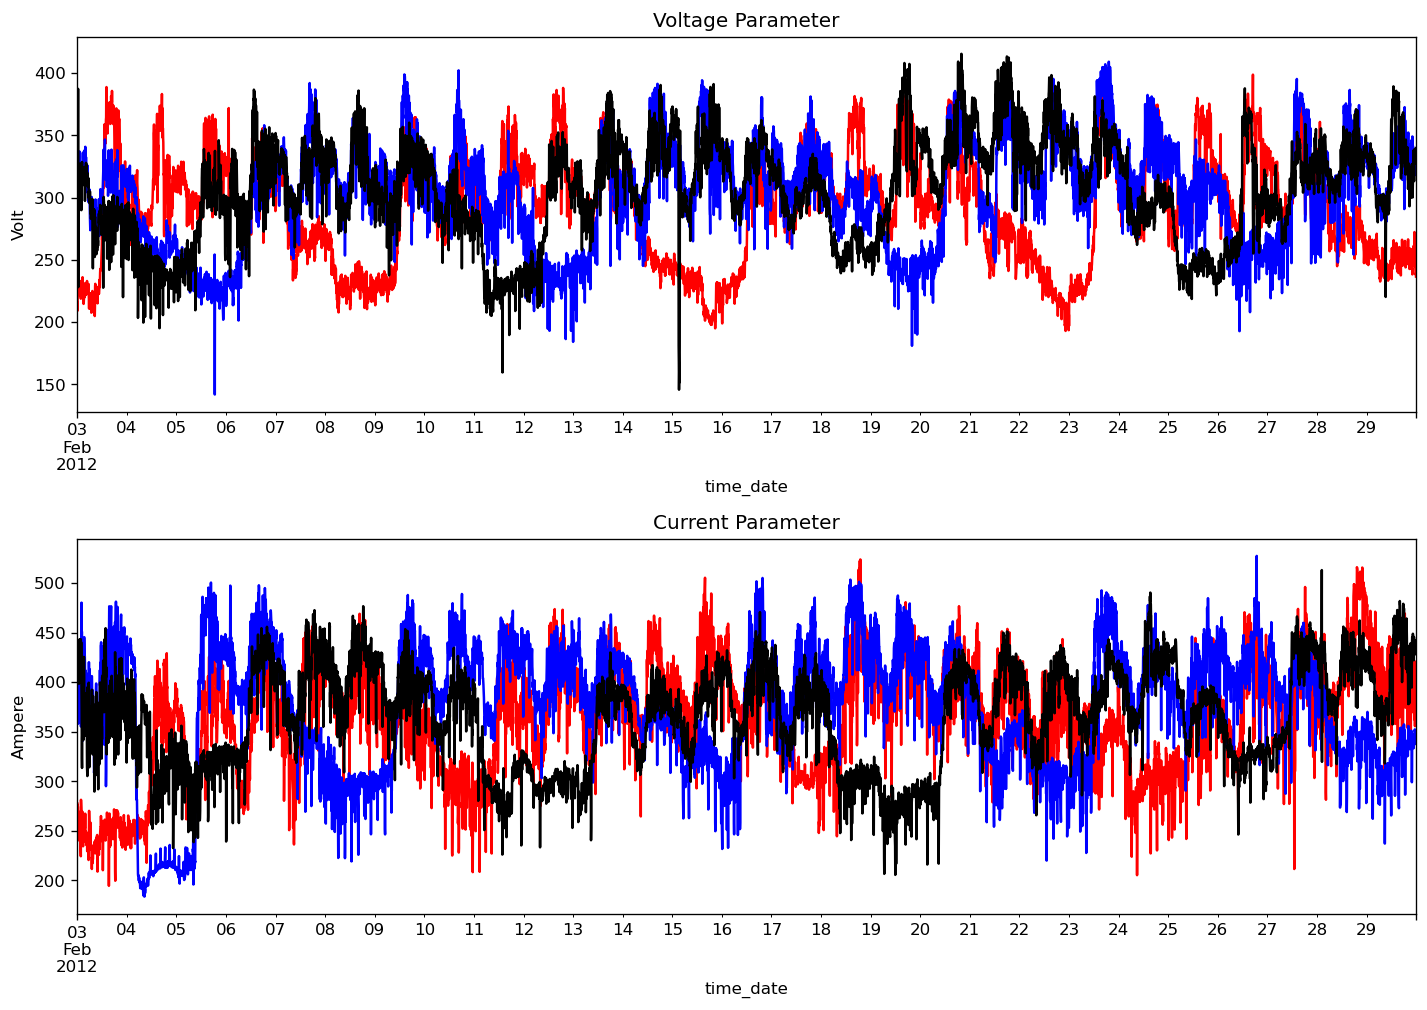

In [15]:
plt.subplots(nrows=2, ncols=1, dpi=120, figsize=(12,12))

plt.subplot(311)
plt.title ('Voltage Parameter')
plt.xlabel ('Time')
plt.ylabel ('Volt')
V1.plot( color='r')
V2.plot( color='b')
V3.plot( color='black')

plt.subplot(312)
plt.title ('Current Parameter')
plt.xlabel ('Time')
plt.ylabel ('Ampere')
C1.plot( color='r')
C2.plot( color='b')
C3.plot( color='black')

plt.tight_layout();

In [16]:
normal = np.mean((V1+V2+V3)/3)
normal

301.87784525034215

In [17]:
max = np.max(V1)
if (np.max(V2)>max):
    max = np.max(V2)
if (np.max(V3)>max):
    max = np.max(V3)
    
min = np.min(V1)
if (np.min(V2)<min):
    min = np.min(V2)
if (np.min(V3)<min):
    min = np.min(V3)
min

141.8357

In [18]:
rng = max-min
high_rng1 = (max-normal)*0.03+normal
low_rng1 = normal - ((normal-min)*0.03)
high_rng2 = (max-normal)*0.05+normal
low_rng2 = normal - ((normal-min)*0.05)

In [19]:
v = [V1, V2, V3]

In [20]:
a1 = 0
a2 = 0
a3 = 0
for n in v:
    for x in n:
        if(x >= high_rng2):
            a3 = a3 + 1
        if(x >= high_rng1 and x<high_rng2 ):
            a2 = a2 + 1
        if(x >= low_rng1 and x<high_rng1 ):
            a1 = a1 + 1
        if(x >= low_rng2 and x<low_rng1 ):
            a2 = a2 + 1
        if(x < low_rng2):
            a3 = a3 + 1

In [21]:
a1+a2+a3

23328

In [22]:
len(V1)*3

23328

In [23]:
table = [['Range', 'Frequency'], ['<3%', a1],['3-5%', a2],['>5%', a3]]

In [24]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════╕
│ Range   │   Frequency │
╞═════════╪═════════════╡
│ <3%     │        1804 │
├─────────┼─────────────┤
│ 3-5%    │        1213 │
├─────────┼─────────────┤
│ >5%     │       20311 │
╘═════════╧═════════════╛


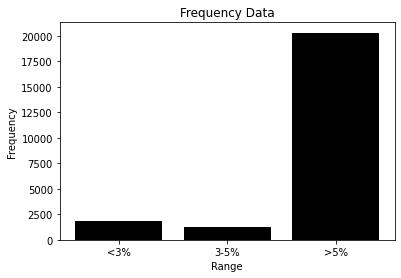

In [25]:
Range = ['<3%','3-5%','>5%']
Freq = [a1,a2,a3]
plt.bar(Range,Freq, color='black')
plt.title('Frequency Data')
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.show()

In [26]:
#a = pd.crosstab(index=V1, columns='count')
#b = pd.crosstab(index=V2, columns='count')
#c = pd.crosstab(index=V3, columns='count')

In [27]:
#def maxfreq(u,v,w):
 #   def max_freq(a):
  #      for i in a.index:
   #         if(int(a.loc[i])==int(np.max(a))):
    #            return i
    #n = [max_freq(u), max_freq(v), max_freq(w)]
    #m = [u, v, w]
    #freq = 0
    #for i in n:
     #   if(i == np.max(n)):
      #      freq = m[n.index(np.max(n))]
    #print('Frequency max in',np.max(n),'with',int(freq.loc[np.max(n)]),'data')
   

In [28]:
#maxfreq(a,b,c)

In [29]:
def max_pvur(a,b,c):
    x = 0
    y = 0
    z = 0
    max = []
    for i in range(len(a)):
        x = a[i]-(a[i]+b[i]+c[i])/3
        y = b[i]-(a[i]+b[i]+c[i])/3
        z = c[i]-(a[i]+b[i]+c[i])/3
        
        m = [x,y,z]
        max.append(np.max(m))
        
    return max

def cal(a,b,c):
    n = (a+b+c)/3
    
    return n

In [30]:
max = max_pvur(V1,V2,V3)
pvur = max/cal(V1,V2,V3) * 100

In [31]:
pvur_df = V1_df
pvur_df['value'] = pvur
PVUR = pvur_df['value']

In [32]:
PVUR

time_date
2012-02-03 00:00:00+00:00    15.392644
2012-02-03 00:05:00+00:00    11.659917
2012-02-03 00:10:00+00:00    14.468738
2012-02-03 00:15:00+00:00    11.513271
2012-02-03 00:20:00+00:00    11.044306
                               ...    
2012-02-29 23:35:00+00:00    10.914590
2012-02-29 23:40:00+00:00    11.667080
2012-02-29 23:45:00+00:00    13.458548
2012-02-29 23:50:00+00:00    11.361979
2012-02-29 23:55:00+00:00    12.152633
Freq: 5T, Name: value, Length: 7776, dtype: float64

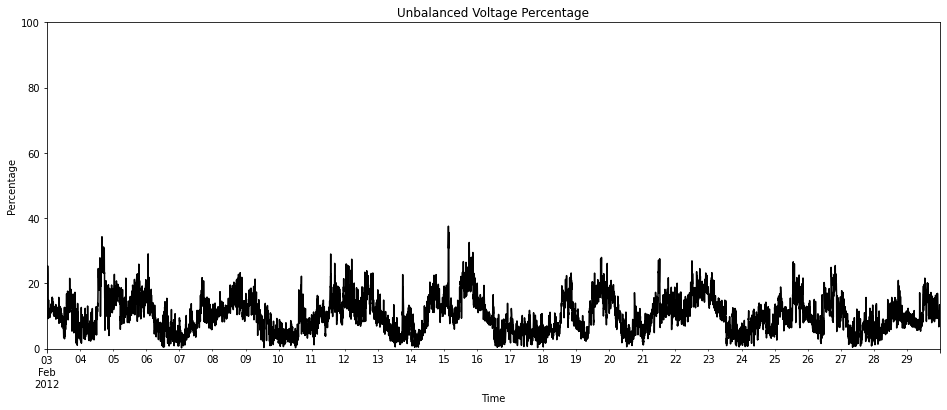

In [33]:
plt.figure(figsize = (16,6))
PVUR.plot( color='black')
plt.title('Unbalanced Voltage Percentage')
plt.ylabel('Percentage')
plt.xlabel('Time')
plt.ylim(0,100)
plt.show()

In [34]:
PVUR['2012-02-04']

time_date
2012-02-04 00:00:00+00:00     5.507753
2012-02-04 00:05:00+00:00     5.140163
2012-02-04 00:10:00+00:00     4.371363
2012-02-04 00:15:00+00:00     2.504514
2012-02-04 00:20:00+00:00     2.680502
                               ...    
2012-02-04 23:35:00+00:00    13.249033
2012-02-04 23:40:00+00:00    13.801159
2012-02-04 23:45:00+00:00    13.810331
2012-02-04 23:50:00+00:00    18.388426
2012-02-04 23:55:00+00:00    17.381227
Freq: 5T, Name: value, Length: 288, dtype: float64

In [35]:
Rl = 1
Rn = 1
Rg = 1

In [36]:
def diff_loss(a,b,c,d):
    diff = []
    x = cal(a,b,c)
    balanced_load = 0
    unbalanced_load = 0
    for i in range(len(a)):
        balanced_load = ((x[i]**2*Rl)+(x[i]**2*Rn)+(x[i]**2*Rg))/1000
        unbalanced_load = ((a[i]**2*Rl)+(b[i]**2*Rn)+(c[i]**2*Rg))/1000
        
        diff.append(((unbalanced_load - balanced_load)*d[i])*5/60)
        
    return diff

In [37]:
diff = diff_loss(C1,C2,C3,P)
diff_df = C1_df
diff_df['value'] = diff
Diff = diff_df['value']

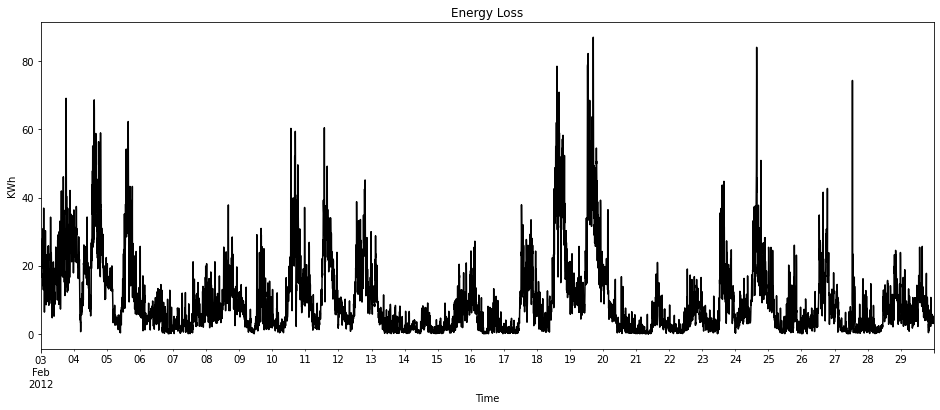

In [38]:
plt.figure(figsize = (16,6))
Diff.plot( color='black')
plt.title('Energy Loss')
plt.ylabel('KWh')
plt.xlabel('Time')
plt.show()

In [39]:
Diff_day = []
for i in range(27):
    y = np.sum(Diff[288*i:288*(i+1)])
    Diff_day.append(y)

In [40]:
dti = pd.date_range("2012-02-03", periods=27, freq="D")
Diff_day = pd.Series(Diff_day, index = dti)

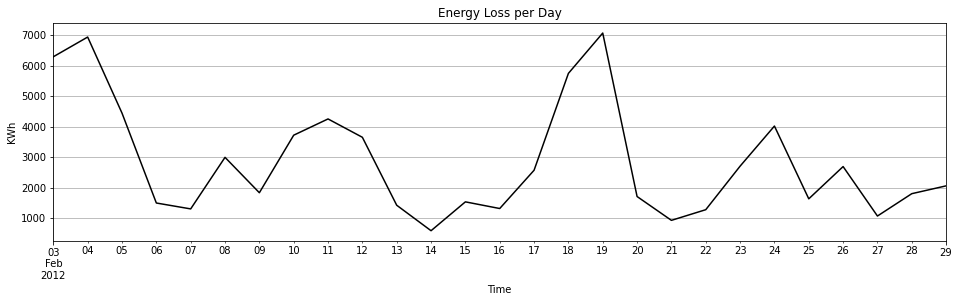

Total Energy Loss in a month is: 77104.71 KWh


In [41]:
plt.figure(figsize = (16,4))
Diff_day.plot( color='black')
plt.title('Energy Loss per Day')
plt.ylabel('KWh')
plt.xlabel('Time')
plt.grid()
plt.show()
print('Total Energy Loss in a month is:', round(np.sum(Diff_day),2), 'KWh')

In [42]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(Diff)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")
#Since data is not stationary, we may need SARIMA and not just ARIMA

pvalue =  3.6863108796616645e-08  if above 0.05, data is not stationary


In [43]:
#freq = int(pd.infer_freq(Diff.index))

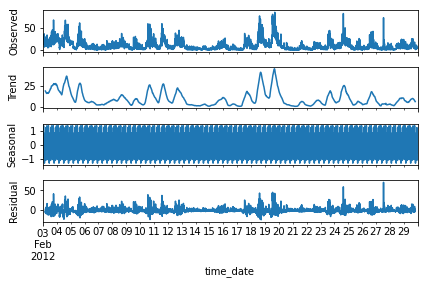

In [44]:
#Extract and plot trend, seasonal and residuals. 
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(Diff,  model ='additive', freq = 100).plot()

In [45]:
from fbprophet import Prophet

In [72]:
model = Prophet(daily_seasonality=True)

In [73]:
Diff_df = x_df

In [74]:
Diff_df.columns = ['ds','y']

In [75]:
Diff_df.reset_index(drop=True, inplace=True)

In [76]:
Diff_df = Diff_df.drop(Diff_df.index[7776:])
#for i in Diff_df.index:
 #   if (i > 7775):
  #      Diff_df = Diff_df.drop(i)

In [77]:
Diff_df['ds']=Diff.index
Diff_df['y'][0:7776]=Diff[0:7776]

In [78]:
Diff_df
Diff_df['ds'] = Diff_df['ds'].dt.tz_localize(None)

In [79]:
model.fit(Diff_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [80]:
Diff_df

,ds,y
0,2012-02-03 00:00:00,17.973109
1,2012-02-03 00:05:00,21.573642
2,2012-02-03 00:10:00,20.290005
3,2012-02-03 00:15:00,25.460413
4,2012-02-03 00:20:00,19.511600
...,...,...
7771,2012-02-29 23:35:00,4.293492
7772,2012-02-29 23:40:00,3.989313
7773,2012-02-29 23:45:00,3.865236
7774,2012-02-29 23:50:00,3.024714


In [81]:
future = model.make_future_dataframe(periods=288*27, freq='5min')

In [82]:
pred = model.predict(future)

In [83]:
pred = pred[['ds','yhat','yhat_lower','yhat_upper']]
pred_yhat = pred[['ds','yhat']]
pred

,ds,yhat,yhat_lower,yhat_upper
0,2012-02-03 00:00:00,20.175200,10.627787,28.592812
1,2012-02-03 00:05:00,20.251611,10.412968,29.688201
2,2012-02-03 00:10:00,20.331386,10.901809,29.875946
3,2012-02-03 00:15:00,20.413660,10.116087,29.961347
4,2012-02-03 00:20:00,20.497551,10.627680,29.972837
...,...,...,...,...
15547,2012-03-27 23:35:00,8.960533,-199.514826,205.228181
15548,2012-03-27 23:40:00,9.023966,-200.420191,200.636626
15549,2012-03-27 23:45:00,9.094470,-198.280969,200.721020
15550,2012-03-27 23:50:00,9.171344,-196.907677,203.697835


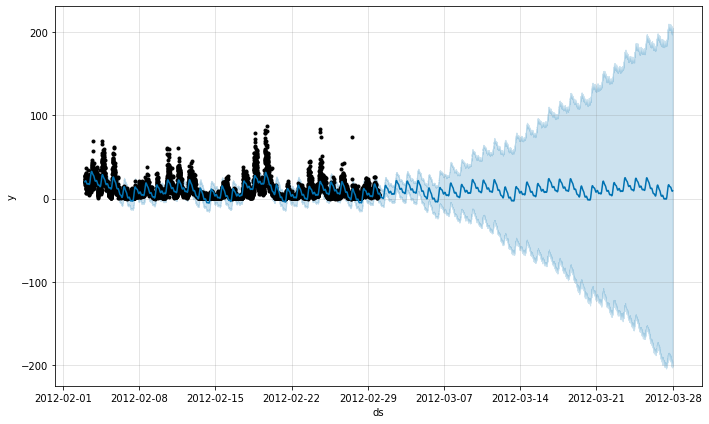

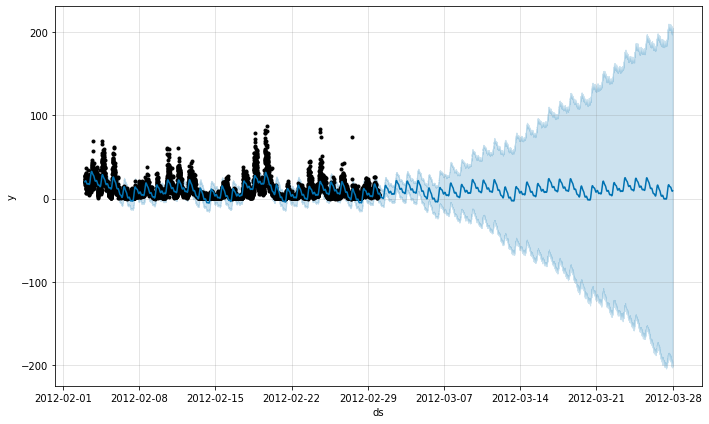

In [84]:
model.plot(pred)

KeyError: 'trend'

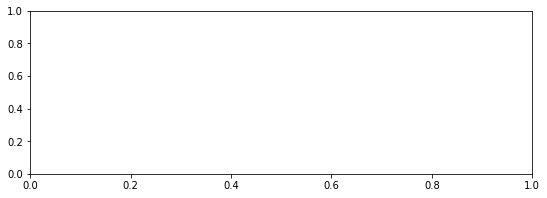

In [71]:
fig2 = model.plot_components(pred)
plt.show()

In [62]:
train = Diff_df.drop(Diff_df.index[-288*3:])
print(train.tail())
train

                      ds         y
6907 2012-02-26 23:35:00  4.289216
6908 2012-02-26 23:40:00  2.959154
6909 2012-02-26 23:45:00  6.022891
6910 2012-02-26 23:50:00  4.811037
6911 2012-02-26 23:55:00  3.937310


,ds,y
0,2012-02-03 00:00:00,17.973109
1,2012-02-03 00:05:00,21.573642
2,2012-02-03 00:10:00,20.290005
3,2012-02-03 00:15:00,25.460413
4,2012-02-03 00:20:00,19.511600
...,...,...
6907,2012-02-26 23:35:00,4.289216
6908,2012-02-26 23:40:00,2.959154
6909,2012-02-26 23:45:00,6.022891
6910,2012-02-26 23:50:00,4.811037


In [63]:
model.fit(train)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [ ]:
future1 = model.make_future_dataframe(periods=288*3, freq='5min')

In [ ]:
forecast = model.predict(future1)

In [ ]:
y_true = Diff_df['y'][-288*7:].values
y_pred = forecast['yhat'][-288*7:].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*14:-288*13].values
y_pred = forecast['yhat'][-288*14:-288*13].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE7: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*13:-288*12].values
y_pred = forecast['yhat'][-288*13:-288*12].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE6: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*12:-288*11].values
y_pred = forecast['yhat'][-288*12:-288*11].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE5: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*11:-288*10].values
y_pred = forecast['yhat'][-288*11:-288*10].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE4: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*10:-288*9].values
y_pred = forecast['yhat'][-288*10:-288*9].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE3: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*9:-288*8].values
y_pred = forecast['yhat'][-288*9:-288*8].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE2: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*8:-288*7].values
y_pred = forecast['yhat'][-288*8:-288*7].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*7:-288*6].values
y_pred = forecast['yhat'][-288*7:-288*6].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*6:-288*5].values
y_pred = forecast['yhat'][-288*6:-288*5].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*5:-288*4].values
y_pred = forecast['yhat'][-288*5:-288*4].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*4:-288*3].values
y_pred = forecast['yhat'][-288*3:-288*2].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*3:-288*2].values
y_pred = forecast['yhat'][-288*3:-288*2].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288*2:-288].values
y_pred = forecast['yhat'][-288*2:-288].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
y_true = Diff_df['y'][-288:].values
y_pred = forecast['yhat'][-288:].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
plt.figure(figsize = (16,6))
Diff_df['y'][:].plot( color='orange',)
forecast['yhat'][:].plot( color='green')
forecast['yhat'][-288*3:].plot( color='red')


#plt.title('Unbalanced Voltage Percentage')
#plt.ylabel('Percentage')
#plt.xlabel('Time')
#plt.ylim(0,100)
plt.show()

In [ ]:
model.plot(forecast)

In [ ]:
np.sum(Diff_df['y'][-288*3:])

In [ ]:
np.sum(forecast['yhat'][-288*3:])

In [ ]:
7776/288

In [ ]:
Diff_df['y'][:-288*7]